In [1]:
#import libraries for convolutional neural network
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#import libraries for plotting
import matplotlib.pyplot as plt

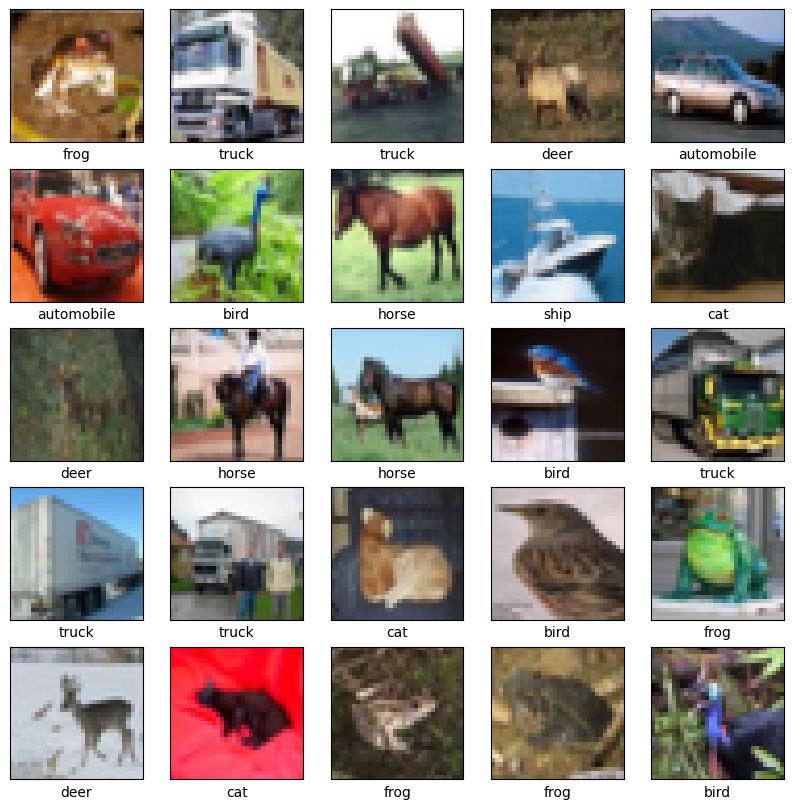

In [2]:

#load cifar dataset
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#plot first 25 images in training set
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:


#build convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:

#compile model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#train model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

#evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5346 - accuracy: 0.4409 - val_loss: 1.2837 - val_accuracy: 0.5377
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1600 - accuracy: 0.5895 - val_loss: 1.0962 - val_accuracy: 0.6180
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0173 - accuracy: 0.6426 - val_loss: 1.0758 - val_accuracy: 0.6243
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9211 - accuracy: 0.6776 - val_loss: 0.9633 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8495 - accuracy: 0.7021 - val_loss: 0.9208 - val_accuracy: 0.6791
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7890 - accuracy: 0.7227 - val_loss: 0.9343 - val_accuracy: 0.6802
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7470 - accuracy: 0.7398 - val_loss: 0.8719 -

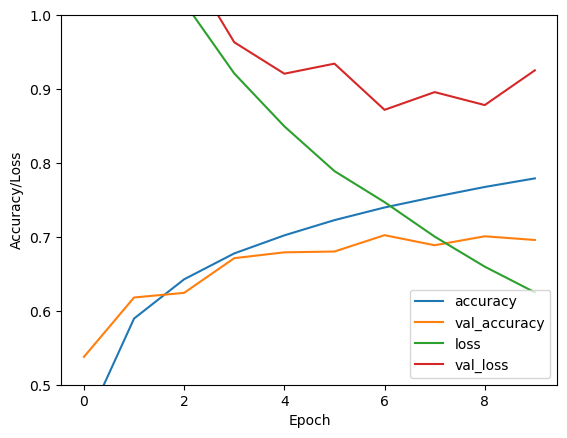

In [5]:
#plot accuracy and loss over time
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [6]:
#make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])


313/313 [==============================] - 3s 8ms/step
[0.01714247 0.1121688  0.00722736 0.3409077  0.00308963 0.14688331
 0.2079948  0.0016249  0.00445735 0.15850358]
3
[3]


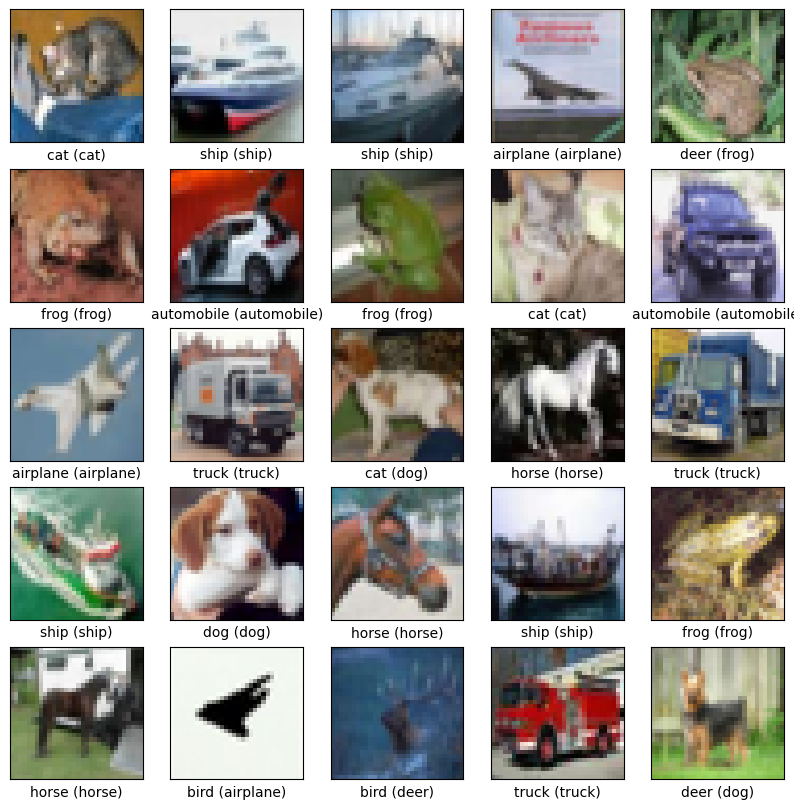

In [7]:

#plot first 25 images in test set with predicted and actual labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    prediction = np.argmax(predictions[i])
    actual = test_labels[i][0]
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} ({})".format(class_names[prediction], class_names[actual]))
plt.show()

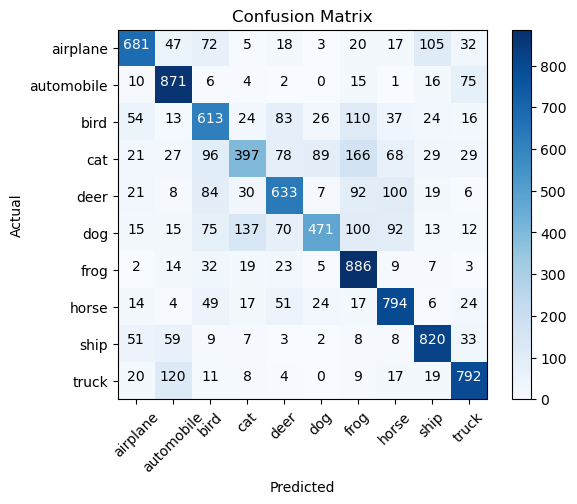

In [8]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
plt.show()


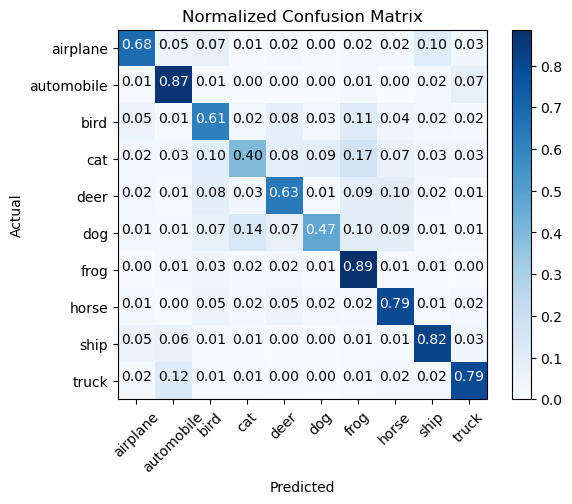

In [9]:
#plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
plt.show()

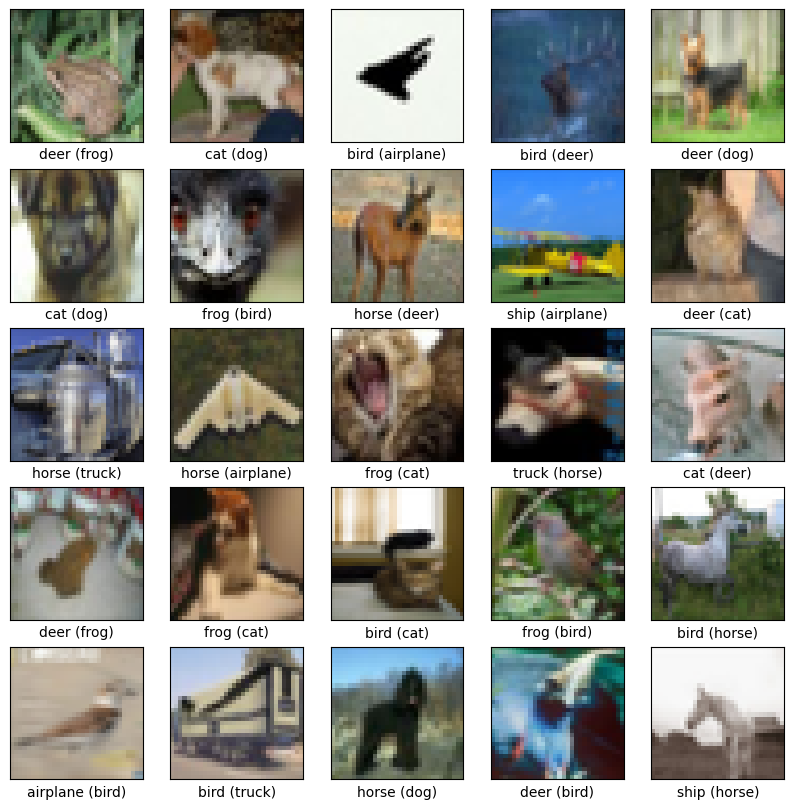

In [10]:
#plot images that were incorrectly classified
incorrect = []
for i in range(len(test_labels)):
    if np.argmax(predictions[i]) != test_labels[i][0]:
        incorrect.append(i)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    prediction = np.argmax(predictions[incorrect[i]])
    actual = test_labels[incorrect[i]][0]
    plt.imshow(test_images[incorrect[i]], cmap=plt.cm.binary)
    plt.xlabel("{} ({})".format(class_names[prediction], class_names[actual]))
plt.show()

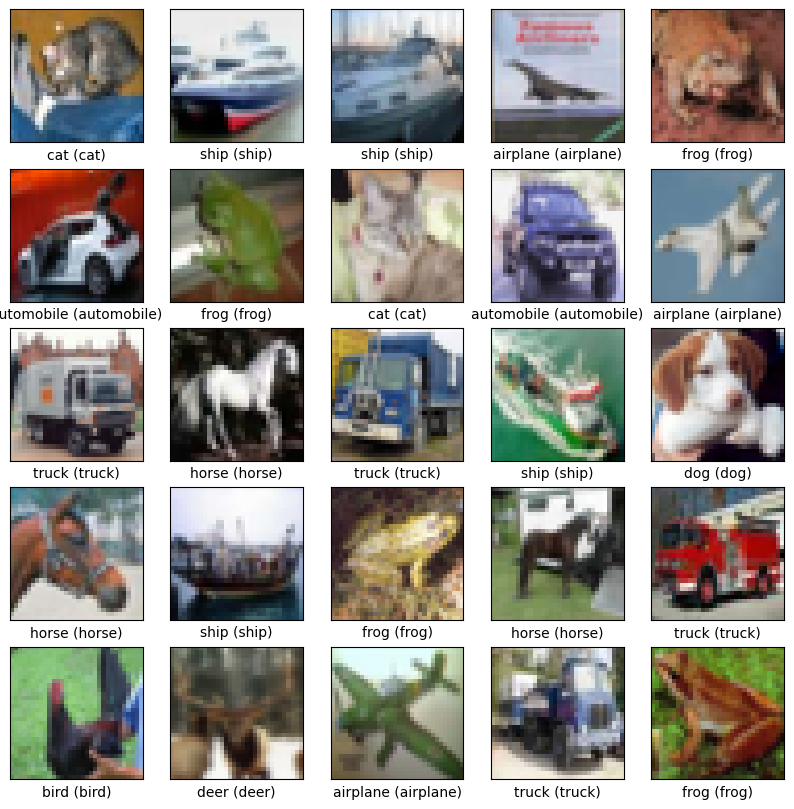

In [11]:
#plot images that were correctly classified
correct = []
for i in range(len(test_labels)):
    if np.argmax(predictions[i]) == test_labels[i][0]:
        correct.append(i)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    prediction = np.argmax(predictions[correct[i]])
    actual = test_labels[correct[i]][0]
    plt.imshow(test_images[correct[i]], cmap=plt.cm.binary)
    plt.xlabel("{} ({})".format(class_names[prediction], class_names[actual]))
plt.show()

